## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente. 
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

In [2]:
import pandas as pd

In [3]:
df_fifa = pd.read_csv('../Data/fifa.csv')
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
df_fifa.Height

0         5'9"
1         6'0"
2         5'4"
3        5'10"
4        5'11"
         ...  
13695     5'8"
13696     6'5"
13697     5'7"
13698    5'11"
13699    5'10"
Name: Height, Length: 13700, dtype: object

In [5]:
df_fifa.columns[3:]

Index(['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LA

In [6]:
df_fifa.describe()

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,...,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8561.641971,219378.929708,25.286058,5.509927,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,...,15.830292,1630.103942,361.317007,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912
std,4954.144383,37445.343736,4.944498,5.797176,72.412379,17.899930,19.411530,17.010578,13.975634,17.760924,...,17.276491,260.986045,40.258414,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189
min,1.000000,16.000000,16.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,...,1.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,4269.750000,203979.750000,21.000000,0.000000,231.000000,41.000000,33.000000,45.000000,56.000000,32.000000,...,8.000000,1491.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,8555.500000,228927.000000,25.000000,4.000000,271.000000,56.000000,52.000000,56.000000,63.000000,47.000000,...,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,12887.250000,244043.500000,29.000000,9.000000,306.000000,65.000000,64.000000,65.000000,69.000000,59.000000,...,14.000000,1811.250000,389.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
max,17122.000000,259091.000000,47.000000,26.000000,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,...,90.000000,2304.000000,498.000000,96.000000,93.000000,93.000000,95.000000,90.000000,93.000000,93.000000


In [7]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Columns: 102 entries, Unnamed: 0 to OVA
dtypes: float64(10), int64(44), object(48)
memory usage: 10.7+ MB


In [8]:
len(df_fifa)

13700

Esta es la info básica del dataframe:
- El formato de las variables son: float, int y object
- 102 columnas
- 13700 filas

In [9]:
df_fifa[['Weight','Height']]

,Weight,Height
0,161lbs,"5'9"""
1,159lbs,"6'0"""
2,134lbs,"5'4"""
3,152lbs,"5'10"""
4,150lbs,"5'11"""
...,...,...
13695,143lbs,"5'8"""
13696,176lbs,"6'5"""
13697,146lbs,"5'7"""
13698,176lbs,"5'11"""


In [10]:
df_fifa['Weight'] = df_fifa['Weight'].str.replace('lbs', '').astype(float)
type(df_fifa['Weight'][1])

numpy.float64

In [11]:
df_fifa['weight_kg'] = df_fifa['Weight'] * 0.453592


In [12]:
df_fifa[['feet', 'inches']] = df_fifa['Height'].str.extract(r"(\d+)'(\d+)")
df_fifa['feet'] = df_fifa['feet'].astype(float)
df_fifa['inches'] = df_fifa['inches'].astype(float)
df_fifa['height_inches'] = df_fifa['feet'] * 12 + df_fifa['inches']
df_fifa['height_cm'] = df_fifa['height_inches'] * 2.54

In [13]:
df_fifa2 = df_fifa.drop(['Weight', 'Height'], axis=1)

In [14]:

df_fifa2 = df_fifa2.rename(columns={
    'weight_kg': 'Weight',
    'height_cm': 'Height'
})
df_fifa2[['Weight','Height']]

,Weight,Height
0,73.028312,175.26
1,72.121128,182.88
2,60.781328,162.56
3,68.945984,177.80
4,68.038800,180.34
...,...,...
13695,64.863656,172.72
13696,79.832192,195.58
13697,66.224432,170.18
13698,79.832192,180.34


In [15]:
df_fifa2.columns[72:100]

Index(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA'],
      dtype='object')

In [16]:
clean_col = df_fifa2.columns[72:100]
df_fifa2[clean_col] = df_fifa2[clean_col].replace(r'^(\d+)\+.*', r'\1', regex=True).astype(int)
df_fifa3 = df_fifa2

In [17]:
df_fifa3[clean_col]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,58,58,58,61,62,62,62,61,63,63,...,59,59,59,58,54,54,54,58,15,64
1,77,77,77,77,77,77,77,77,76,76,...,53,53,57,53,48,48,48,53,18,77
2,73,73,73,80,79,79,79,80,80,80,...,56,56,59,53,41,41,41,53,12,80
3,50,50,50,51,51,51,51,51,53,53,...,58,58,56,57,58,58,58,57,14,59
4,56,56,56,59,59,59,59,59,61,61,...,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,44,44,44,51,48,48,48,51,48,48,...,52,52,58,58,54,54,54,58,15,60
13696,22,22,22,20,22,22,22,20,23,23,...,23,23,20,20,22,22,22,20,58,59
13697,67,67,67,74,73,73,73,74,76,76,...,60,60,62,57,47,47,47,57,18,76
13698,55,55,55,56,55,55,55,56,57,57,...,62,62,60,60,63,63,63,60,14,63


In [18]:
columns_2 = df_fifa3.columns[[60, 61, 65]]
df_fifa3[[columns_2][0]]

,W/F,SM,PAC
0,4 ★,2★,69
1,3 ★,4★,83
2,4 ★,4★,80
3,2 ★,2★,57
4,2 ★,3★,66
...,...,...,...
13695,3 ★,2★,76
13696,2 ★,1★,60
13697,4 ★,4★,65
13698,3 ★,2★,53


In [19]:
#df_fifa3[columns_2] = df_fifa3[columns_2].replace(r'\s*\u2605$', regex=True).astype(int)
df_fifa3[columns_2] = df_fifa3[columns_2].replace(r'\s*★', '', regex=True).astype(int)

df_fifa4 = df_fifa3

In [20]:
df_fifa4[[columns_2][0]]

,W/F,SM,PAC
0,4,2,69
1,3,4,83
2,4,4,80
3,2,2,57
4,2,3,66
...,...,...,...
13695,3,2,76
13696,2,1,60
13697,4,4,65
13698,3,2,53


In [21]:
cols = ["W/F", "SM", "PAC"]
df_fifa3[cols] = df_fifa3[cols].astype(str)
df_fifa3[cols] = df_fifa3[cols].apply(lambda col: col.str.replace(r'\s*★$', '', regex=True))
df_fifa3[cols] = df_fifa3[cols].astype(int)


In [22]:
df_fifa4 = df_fifa3

In [23]:
print(df_fifa4[cols])

       W/F  SM  PAC
0        4   2   69
1        3   4   83
2        4   4   80
3        2   2   57
4        2   3   66
...    ...  ..  ...
13695    3   2   76
13696    2   1   60
13697    4   4   65
13698    3   2   53
13699    3   2   64

[13700 rows x 3 columns]


In [24]:
df_fifa2.columns[72:100]

Index(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA'],
      dtype='object')

In [25]:
portero = ['GK']
defensa = ['RB','CB','RCB','LCB','LB','RWB','LWD']
centrocampistas = ['RDM','CDM','LDM','RM','RCM','CM','LCM','LM','RAM','CAM','LAM']
atacantes = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']

In [26]:
def clas_pos(bp):
    if bp in portero:
        return 'Portero'
    elif bp in defensa:
        return 'Defensa'
    elif bp in centrocampistas:
        return 'Centrocampista'
    elif bp in atacantes:
        return 'Atacante'
df_fifa4['posicion'] = df_fifa4['BP'].apply(clas_pos)

In [27]:
df_fifa5 = df_fifa4
df_fifa5

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,foot,...,RCB,RB,GK,OVA,Weight,feet,inches,height_inches,Height,posicion
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,Right,...,54,58,15,64,73.028312,5.0,9.0,69.0,175.26,Centrocampista
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",Right,...,48,53,18,77,72.121128,6.0,0.0,72.0,182.88,Atacante
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,Right,...,41,53,12,80,60.781328,5.0,4.0,64.0,162.56,Centrocampista
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,Right,...,58,57,14,59,68.945984,5.0,10.0,70.0,177.80,Centrocampista
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,Right,...,61,63,15,65,68.038800,5.0,11.0,71.0,180.34,Centrocampista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,Left,...,54,58,15,60,64.863656,5.0,8.0,68.0,172.72,Defensa
13696,11964,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,Right,...,22,20,58,59,79.832192,6.0,5.0,77.0,195.58,Portero
13697,5390,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,Left,...,47,57,18,76,66.224432,5.0,7.0,67.0,170.18,Centrocampista
13698,860,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,Right,...,63,60,14,63,79.832192,5.0,11.0,71.0,180.34,Centrocampista


In [28]:
print(df_fifa5['Wage'])

0         €4K
1        €23K
2        €49K
3         €4K
4         €2K
         ... 
13695     €1K
13696    €700
13697     €9K
13698     €4K
13699     €1K
Name: Wage, Length: 13700, dtype: object


In [29]:
import re
def to_integer(val):
    if val[-1] == 'K':
        clean = re.sub(r'[^0-9\.]', '', val)
        clean = float(clean)
        return clean * 1000
    if val[-1] == 'M':
        clean = re.sub(r'[^0-9\.]', '', val)
        clean = float(clean)
        return clean * 1000000
    else:
        clean = re.sub(r'[^0-9\.]', '', val)
        clean = float(clean)
        return clean
        

df_fifa5['value_int'] = df_fifa5['Value'].apply(to_integer)
df_fifa5['wage_int'] = df_fifa5['Wage'].apply(to_integer)
    
    

In [30]:
df_fifa6 = df_fifa5
print(df_fifa6[['Value','value_int','Wage','wage_int']])

       Value  value_int  Wage  wage_int
0      €525K   525000.0   €4K    4000.0
1      €8.5M  8500000.0  €23K   23000.0
2        €9M  9000000.0  €49K   49000.0
3      €275K   275000.0   €4K    4000.0
4      €725K   725000.0   €2K    2000.0
...      ...        ...   ...       ...
13695  €325K   325000.0   €1K    1000.0
13696  €190K   190000.0  €700     700.0
13697    €8M  8000000.0   €9K    9000.0
13698  €140K   140000.0   €4K    4000.0
13699  €425K   425000.0   €1K    1000.0

[13700 rows x 4 columns]


------ NULLS -------

In [31]:
# Análisis de calidad de la base de datos
print("TOTAL NUMBER OF ROWS: ",len(df_fifa),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
print("NUMBER OF UNIQUE VALUES:",df_fifa.nunique(),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:",round((df_fifa.nunique()/len(df_fifa)*100),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("% OF NAN VALUES IS: ",round(100*(df_fifa.isnull().sum() / len(df_fifa)),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

TOTAL NUMBER OF ROWS:  13700 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

NUMBER OF UNIQUE VALUES: Unnamed: 0       13700
ID               13700
Name             13064
Age                 29
Nationality        160
                 ...  
weight_kg           55
feet                 2
inches              12
height_inches       21
height_cm           21
Length: 107, dtype: int64 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES: Unnamed: 0       100.00
ID               100.00
Name              95.36
Age                0.21
Nationality        1.17
                  ...  
weight_kg          0.40
feet               0.01
inches             0.09
height_inches      0.15
height_cm          0.15
Length: 107, dtype: float64 %

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

% OF NAN VALUES IS:  Unnamed: 0       0.0
ID               0.0
Name             0.0
Age     

In [32]:
pd.set_option('display.max_rows', 1000)

In [33]:


null_counts = df_fifa6.isnull().sum()
print(null_counts)

Unnamed: 0              0
ID                      0
Name                    0
Age                     0
Nationality             0
Club                   21
BP                      0
Position              343
Team & Contract         0
foot                    0
Growth                  0
Joined                 44
Loan Date End       12961
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                44
Skill                   0
Dribbling               0
Curve                  44
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                44
Reactions               0
Balance                44
Power                   0
Shot Power              0
Jumping                44
Stamina     

In [34]:
print(df_fifa6[['Position','BP']])

        Position   BP
0         CM CDM   CM
1       ST LW LM   ST
2         CAM CF  CAM
3         CDM CM  CDM
4         CDM CM  CDM
...          ...  ...
13695         LB   LB
13696         GK   GK
13697  RM CAM CM   RM
13698  CDM RB CM  CDM
13699         CM  CAM

[13700 rows x 2 columns]


Como el campo positions son todas la posiciones en las que puede jugar un jugador, y el campo BP es la mejor posicion. Los nulls de posicion se pueden rellenar con la BP.

In [35]:
df_fifa6['Position'] = df_fifa6['Position'].fillna(df_fifa6['BP'])


In [36]:
import numpy as np
cols_numericas = df_fifa6.select_dtypes(include=[np.number]).columns
df_fifa6[cols_numericas] = df_fifa6[cols_numericas].fillna(df_fifa6[cols_numericas].mean())

In [37]:
# Eliminar la columna "Loan Date End"
df_fifa6 = df_fifa6.drop(columns=["Loan Date End"])

# Eliminar las filas que tengan al menos un valor nulo
df_fifa6 = df_fifa6.dropna()

In [38]:
df_fifa7 = df_fifa6
print(df_fifa7)

       Unnamed: 0      ID           Name  Age  Nationality  \
0            1954  184383      A. Pasche   26  Switzerland   
1            2225  188044  Alan Carvalho   30     China PR   
2            1959  184431    S. Giovinco   33        Italy   
3            9815  233796       J. Evans   22        Wales   
4           10074  234799     Y. Demoncy   23       France   
...           ...     ...            ...  ...          ...   
13695       11284  239074          S. Aw   21      Senegal   
13696       11964  241223        S. Mogi   21        Japan   
13697        5390  210930     Carles Gil   27        Spain   
13698         860  162993       J. Perch   34      England   
13699       15795  254882  A. Oeynhausen   18      Germany   

                             Club   BP   Position  \
0               FC Lausanne-Sport   CM     CM CDM   
1         Beijing Sinobo Guoan FC   ST   ST LW LM   
2                        Al Hilal  CAM     CAM CF   
3                    Swansea City  CDM     

In [39]:
null_counts = df_fifa7.isnull().sum()
print(null_counts)

Unnamed: 0          0
ID                  0
Name                0
Age                 0
Nationality         0
Club                0
BP                  0
Position            0
Team & Contract     0
foot                0
Growth              0
Joined              0
Value               0
Wage                0
Release Clause      0
Contract            0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties 

In [40]:
len(df_fifa7)

13418

--------EXTREME VALUES----------

In [41]:
extreme_values = {}
for col in df_fifa7.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_fifa7[col].quantile(0.25)
    Q3 = df_fifa7[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR #Identifica valors extrems baixos
    upper_bound = Q3 + 1.5 * IQR #Identifica valors extrems alts
    # Contar valores extremos
    num_extremes = df_fifa7[(df_fifa7[col] < lower_bound) | (df_fifa7[col] > upper_bound)].shape[0]
    extreme_values[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Extremes': num_extremes
    }
extreme_df = pd.DataFrame(extreme_values).T
print(extreme_df)

                   Lower Bound   Upper Bound  Number of Extremes
Unnamed: 0       -8.621000e+03  2.584900e+04                 0.0
ID                1.443248e+05  3.040388e+05               390.0
Age               9.000000e+00  4.100000e+01                10.0
Growth           -1.500000e+01  2.500000e+01                 1.0
Attacking         1.185000e+02  4.185000e+02              1258.0
Crossing          2.500000e+00  1.025000e+02                 0.0
Finishing        -1.350000e+01  1.105000e+02                 0.0
Heading Accuracy  1.500000e+01  9.500000e+01               811.0
Short Passing     3.650000e+01  8.850000e+01              1222.0
Volleys          -8.500000e+00  9.950000e+01                 0.0
Skill             1.015000e+02  4.495000e+02               997.0
Dribbling         2.500000e+01  9.700000e+01              1279.0
Curve            -3.500000e+00  1.045000e+02                 0.0
FK Accuracy      -7.000000e+00  9.700000e+01                 0.0
Long Passing      1.50000

------ANALISIS DESCRIPTIVO---------

In [42]:
print(df_fifa7.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team & Contract', 'foot',
       ...
       'GK', 'OVA', 'Weight', 'feet', 'inches', 'height_inches', 'Height',
       'posicion', 'value_int', 'wage_int'],
      dtype='object', length=107)


<AxesSubplot:xlabel='OVA', ylabel='value_int'>

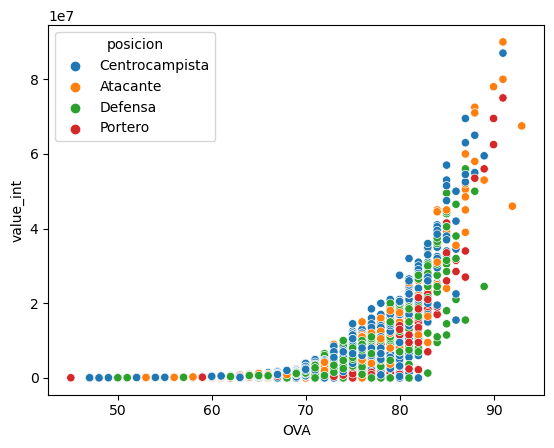

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_fifa7, x="OVA", y="value_int", hue="posicion")



In [49]:
print(df_fifa7.columns.tolist())  

['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'R

<AxesSubplot:xlabel='Height', ylabel='Heading Accuracy'>

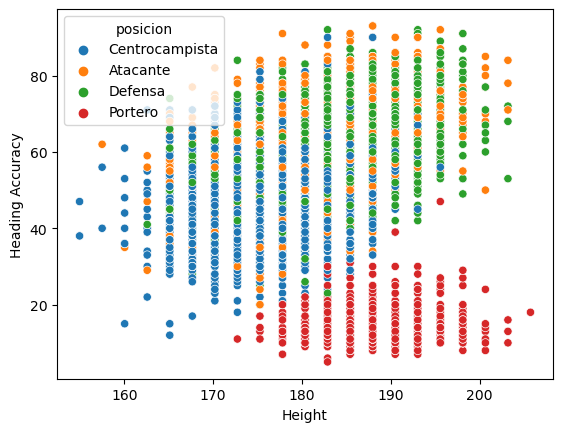

In [50]:
sns.scatterplot(data=df_fifa7, x="Height", y="Heading Accuracy", hue="posicion")

<AxesSubplot:xlabel='Age', ylabel='Stamina'>

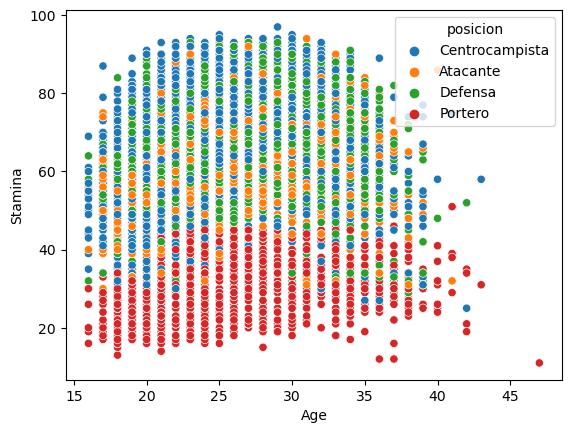

In [51]:
sns.scatterplot(data=df_fifa7, x="Age", y="Stamina", hue="posicion")

<AxesSubplot:xlabel='Attacking', ylabel='Dribbling'>

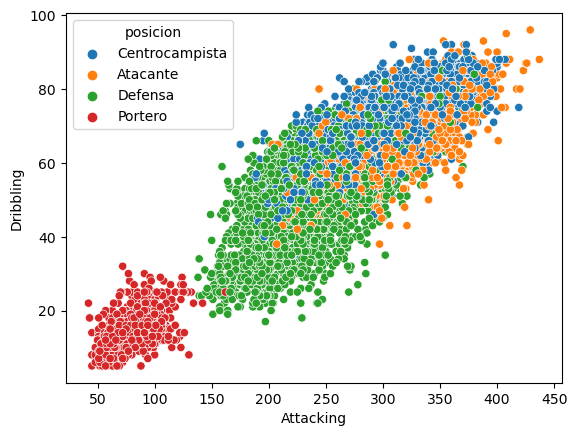

In [52]:
sns.scatterplot(data=df_fifa7, x="Attacking", y="Dribbling", hue="posicion")

In [57]:
print(df_fifa7.columns)  # Muestra todas las columnas del DataFrame

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team & Contract', 'foot',
       ...
       'GK', 'OVA', 'Weight', 'feet', 'inches', 'height_inches', 'Height',
       'posicion', 'value_int', 'wage_int'],
      dtype='object', length=107)


In [56]:
sns.barplot(df_fifa7, x="OVA", y="value_int", estimator="mean", errorbar=None)


ValueError: Could not interpret input 'value_int'